# Desafío - Clasificación desde Machine Learning

Variables del dataframe:

    ● default: Variable binaria.Registra si el cliente entró en morosidad o no.
    ● income: Ingreso promedio declarado por el cliente.
    ● balance: Total de saldo en la cuenta de crédito.
    ● student: Variable binaria. Registra si el cliente es estudiante o no.

# Desafío 1: Preparación del ambiente de trabajo

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#Librerías de sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve

#Fijo tamaño de los gráficos
plt.rcParams["figure.figsize"] = (10,7)

df = pd.read_csv("default_credit.csv").drop(columns = 'index')
print(f"Shape del df: {df.shape}")
df.head()

Shape del df: (10000, 4)


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [2]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

Notamos que el dataset no tiene nulos

# Desafío 2: Análisis exploratorio

Explore las principales relaciones entre las variables. Utilizando los métodos <code>boxplot</code> y <code>lmplot</code> de seaborn implemente los siguientes gráficos.

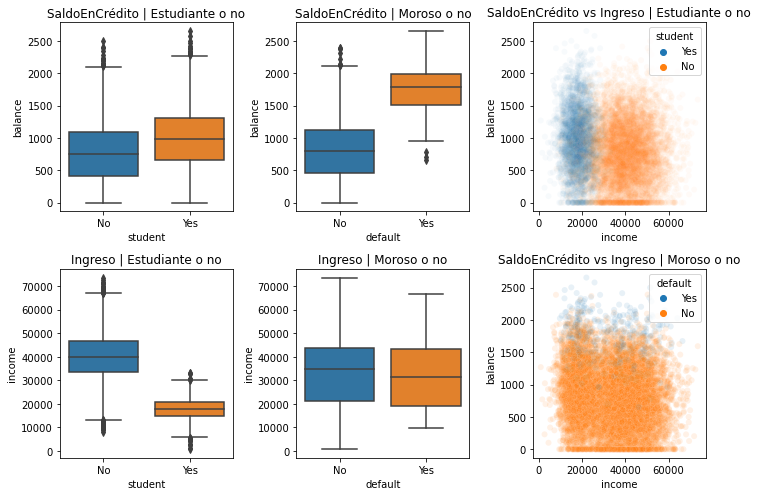

In [3]:
plt.subplot(2,3,1)
sns.boxplot(x = 'student', y = 'balance', data = df
           ).set_title('SaldoEnCrédito | Estudiante o no')

plt.subplot(2,3,4)
sns.boxplot(x = 'student', y = 'income', data = df
           ).set_title('Ingreso | Estudiante o no')

plt.subplot(2,3,2)
sns.boxplot(x = 'default', y = 'balance', data = df
           ).set_title('SaldoEnCrédito | Moroso o no')

plt.subplot(2,3,5)
sns.boxplot(x = 'default', y = 'income', data = df
           ).set_title('Ingreso | Moroso o no')

plt.subplot(2,3,3)
sns.scatterplot(x = 'income', y = 'balance', data = df, hue = 'student', hue_order = ['Yes','No'], alpha = 0.03
               ).set_title('SaldoEnCrédito vs Ingreso | Estudiante o no')

plt.subplot(2,3,6)
sns.scatterplot(x = 'income', y = 'balance', data = df, hue= 'default', hue_order = ['Yes','No'], alpha = 0.1
               ).set_title('SaldoEnCrédito vs Ingreso | Moroso o no')

plt.tight_layout()

*Comentarios:*
1) Los estudiantes tienden a tener un poco más de saldo en crédito que los que no son estudiantes.

2) Como es de esperarse, los estudiantes tienen ingresos mucho menores a los que no lo son.

3) Como es de esperarse, los morosos tienden a tener más saldo en crédito que los que no están morosos.

4) EL nivel de ingreso al aprecer no tiene mucho que ver con si es moroso o no, *esto indicaría que depende de otras cosas.*

5) El gráfico de la esquina superior derecha nos indica nuevamente que el saldo en crédito no tiene inferencia en 
el saldo en la cuenta de crédito de las personas, por otro lado, nuevamente se aprecia que los estudiantes tienen 
menos ingresos que los que no lo son, algo importante notar, es que no importa si eres o no estudiante, las personas 
se distribuyen "equitativamente" entre personas con altos o bajos ingresos y si tienen altos o bajos saldos en crédito, 
no hay tendencia.

6) No sé bien si la base de datos se le hizo balanceo antes o no, pero aquí se ve que los morosos son pocos, y no que no 
discrimina entre si tiene alto o bajos ingresos (nuevamente).


# Desafío 3: Modelación econométrica

a) Recodifi que las variables <code>student</code> y <code>default</code> para que adquieran atributos numéricos.

In [4]:
df.student.replace({'Yes':1,'No':0}, inplace = True)
df.default.replace({'Yes':1,'No':0}, inplace = True)

In [5]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


b) Implemente el siguiente modelo econométrico (Modelo de regresión logística dependiente de forma "lineal" de las variables):

    -balance
    -income
    -student

In [6]:
mod3a = smf.logit('default ~ balance + income + student', data = df).fit() #No olvidar el fit.....
mod3a.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 05 Sep 2021   Pseudo R-squ.:                  0.4619
Time:                        13:12:11   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

*Comentario extra*

#¡Love this!

Tal como vimos en el análisis exploratorio, la variable "income" no tiene mucha incidencia en si las personas serán morosas o no (se puede apreciar en su p_value), por tanto, sacaremos esta variable para depurar el modelo y crear así uno nuevo mejorado.

c) Apartir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [7]:
mod3b = smf.logit('default ~ balance + student', data = df).fit() #No olvidar el fit.....
mod3b.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 05 Sep 2021   Pseudo R-squ.:                  0.4619
Time:                        13:12:11   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

*Comentario:*

El beta de "balance" no cambió, sin embargo el de "student" sí, por otro lado el indicador "Pseudo R-squ." no cambió tampoco, por lo que el modelo al parecer es igual de eficiente hasta ahora  que el anterior, compararemos su f1-score de todas formas:

In [8]:
mod3a.pred_table()

array([[9627.,   40.],
       [ 228.,  105.]])

In [9]:
mod3b.pred_table()

array([[9628.,   39.],
       [ 228.,  105.]])

Las matrices de confusión de ambos modelos son súper parecidas, por lo que el f1-score también debe ser muy muy parecido, no encontré por interner como calcular de forma rápida el f1-score, por tanto no avancé por ese lado por esta razón.

# Desafío 4: Entrenar

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:

a) Genere sub conjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.

In [10]:
x = df.drop(columns = 'default')
y = df.default

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)

b) Estandarice las matrices de atributos de entrenamiento y pruebas usando StandardScaler()
ajustado solo sobre el conjunto de entrenamiento.

c) Implemente el modelo sin alterar los hiper parámetros.

(hice las 2 en una)

*Los parámetros* son los valores DEL MODELO que suele estimar el modelo, por tantom estos no los fija el Data Scientist, son por por ejemplo:

    -Los coeficientes en una regresión lineal o logística.
    -Los pesos en una red neuronal artificial.
    -Los vectores de soporte en una máquina de vectores de soporte.
    
*Los hiperparámetros* por otro lado, son los que fija el Data Scientist, por ejemplo:

    -La ratio de aprendizaje en el algoritmo del descenso del gradiente.
    -El número de vecinos en k-vecinos más cercanos (k-nn).
    -La profundidad máxima en un árbol de decisión

In [11]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe = pipe.fit(x_train, y_train)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

d) Genere la predicción de las clases y de la probabilidad

In [12]:
y_pred = pipe.predict(x_test)

y_proba = pipe.predict_proba(x_test)
y_proba[0:15],y_pred[0:15]

(array([[9.99502346e-01, 4.97654072e-04],
        [9.99968297e-01, 3.17030510e-05],
        [9.95339306e-01, 4.66069399e-03],
        [9.99964856e-01, 3.51442282e-05],
        [9.98538432e-01, 1.46156842e-03],
        [8.62358638e-01, 1.37641362e-01],
        [8.33448131e-01, 1.66551869e-01],
        [9.98680275e-01, 1.31972527e-03],
        [9.99896744e-01, 1.03256391e-04],
        [9.99534642e-01, 4.65357859e-04],
        [9.93431716e-01, 6.56828366e-03],
        [9.82144633e-01, 1.78553673e-02],
        [9.93846487e-01, 6.15351310e-03],
        [9.95526325e-01, 4.47367529e-03],
        [9.99165294e-01, 8.34705627e-04]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

e) Reporte las métricas de precisión, recall y f1 para ambas clases.

In [13]:
print(classification_report(y_test, y_pred, target_names= ['No Moroso','Moroso']))

              precision    recall  f1-score   support

   No Moroso       0.98      1.00      0.99      3194
      Moroso       0.69      0.25      0.37       106

    accuracy                           0.97      3300
   macro avg       0.83      0.63      0.68      3300
weighted avg       0.97      0.97      0.97      3300



f) Grafique la curva Receiver Operator Characteristic

Text(0.5, 1.0, '¡Curva ROC de nuestro modelo que predice pésimo los morosos!')

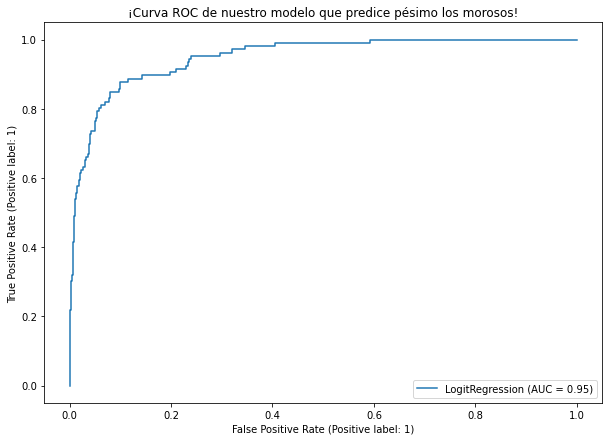

In [14]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(pipe, x_test, y_test, name= 'LogitRegression')
plt.title("¡Curva ROC de nuestro modelo que predice pésimo los morosos!")

g) En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.

*Comentarios:*

La curva ROC se ve como si el modelo fuese buenísimo, y de hecho el AUC lo es (0.95), pero lamentablemente nuestro modelo
sólo predice bien a los no morosos, ya que el f1-score de los no morosos es 0.99, pero el de los morosos es apenas 0.37